EJEMPLO: Optimización de la función de Rosenbrock
Punto inicial: [2. 2.]
Valor inicial de la función: 401.000000
Norma del gradiente inicial: 1651.182606

1. GRADIENTE CONJUGADO FLETCHER-REEVES
----------------------------------------
Gradiente Conjugado (Fletcher-Reeves): Convergió después de 863 iteraciones


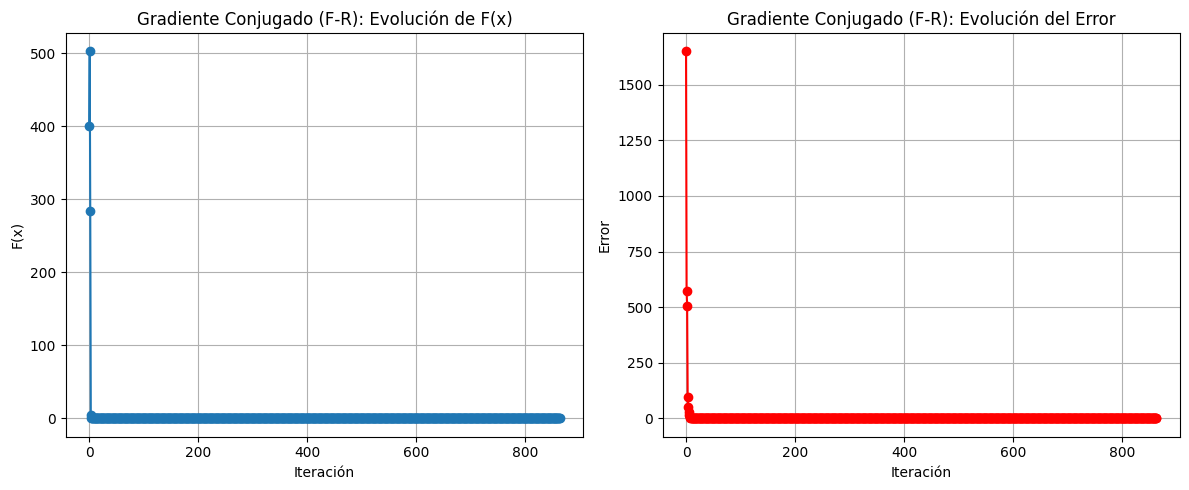

Punto óptimo encontrado: [1.000000, 1.000000]
Valor de la función: 0.000000
Iteraciones: 863
¿Convergió?: True

2. MÉTODO BFGS
----------------------------------------
BFGS: No convergió


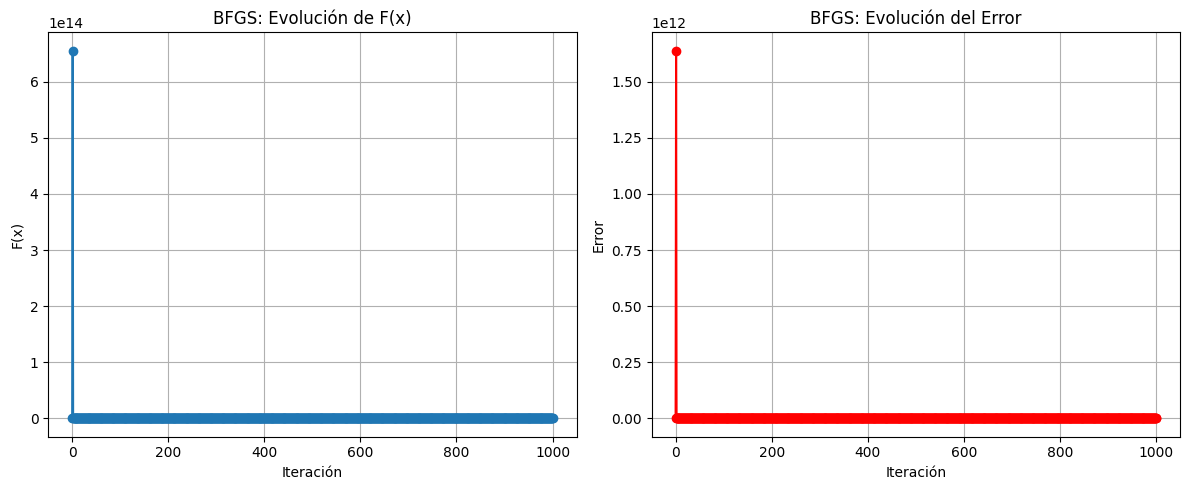

Punto óptimo encontrado: [1.985112, 3.954967]
Valor de la función: 0.990889
Iteraciones: 1000
¿Convergió?: False

3. COMPARACIÓN DE MÉTODOS
----------------------------------------
Método               Punto Final          F(x)         Iteraciones  Convergió 
--------------------------------------------------------------------------------
Fletcher-Reeves      [1.0000, 1.0000]     0.000000     863          True
BFGS                 [1.9851, 3.9550]     0.990889     1000         False
Óptimo teórico       [1.0000, 1.0000]     0.000000     -            -

4. VISUALIZACIÓN COMPARATIVA
----------------------------------------


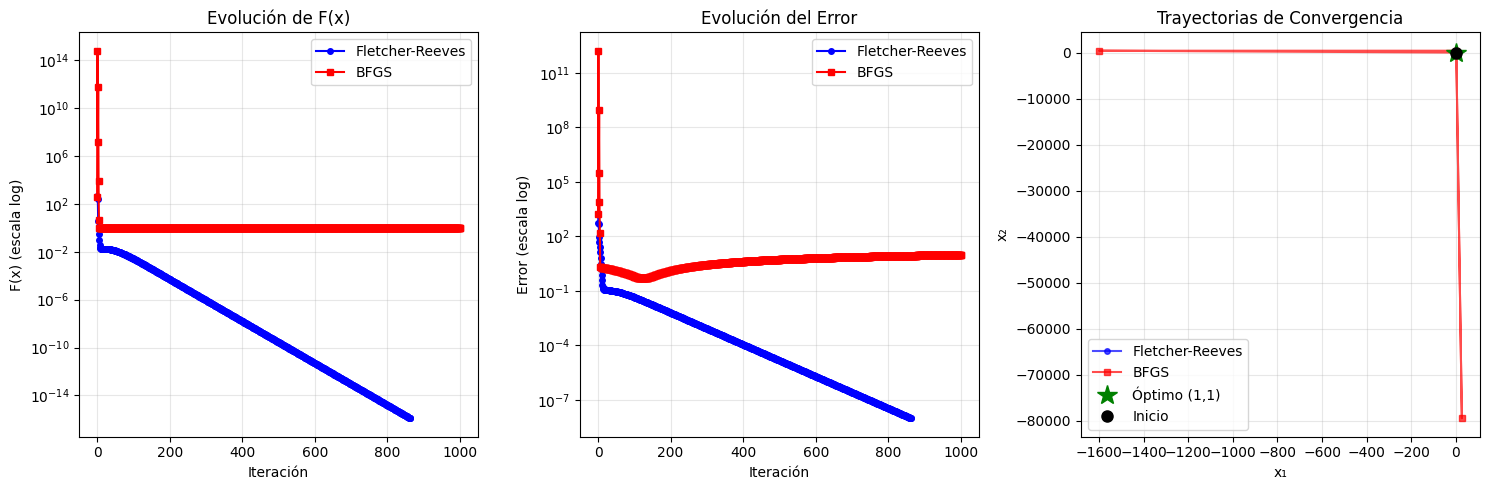


EJEMPLO ADICIONAL: Función Cuadrática Simple
Función: f(x,y) = x² + y² - 2x - 4y + 5
Mínimo teórico: (1, 2) con f(1,2) = 0
Punto inicial: [0. 0.]

Gradiente Conjugado (Fletcher-Reeves): Convergió después de 43 iteraciones


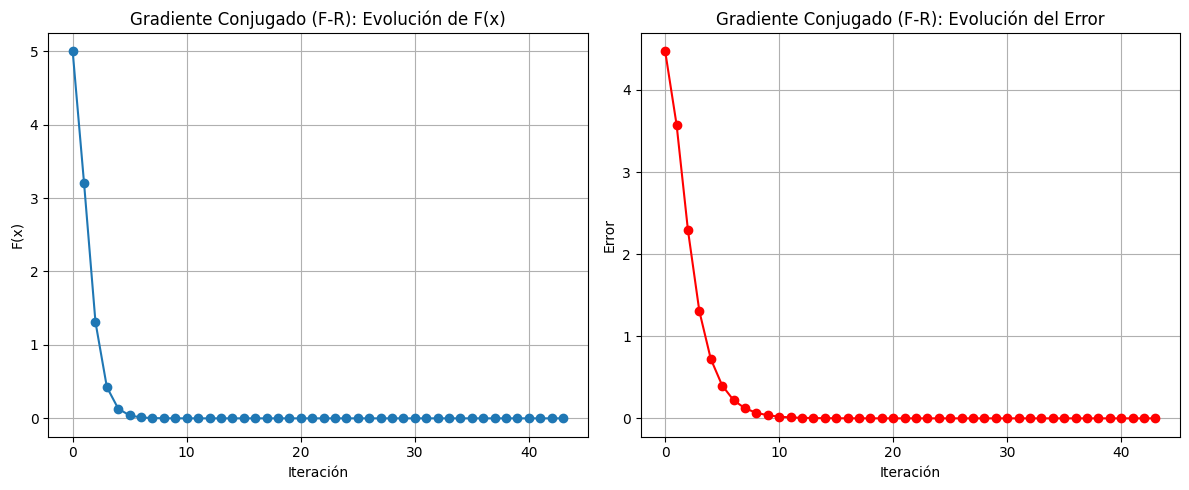

Fletcher-Reeves - Resultado: [1.000000, 2.000000]
Valor función: 0.00000000, Iteraciones: 43, Convergió: True

BFGS: Convergió (Δx < tol) después de 3 iteraciones


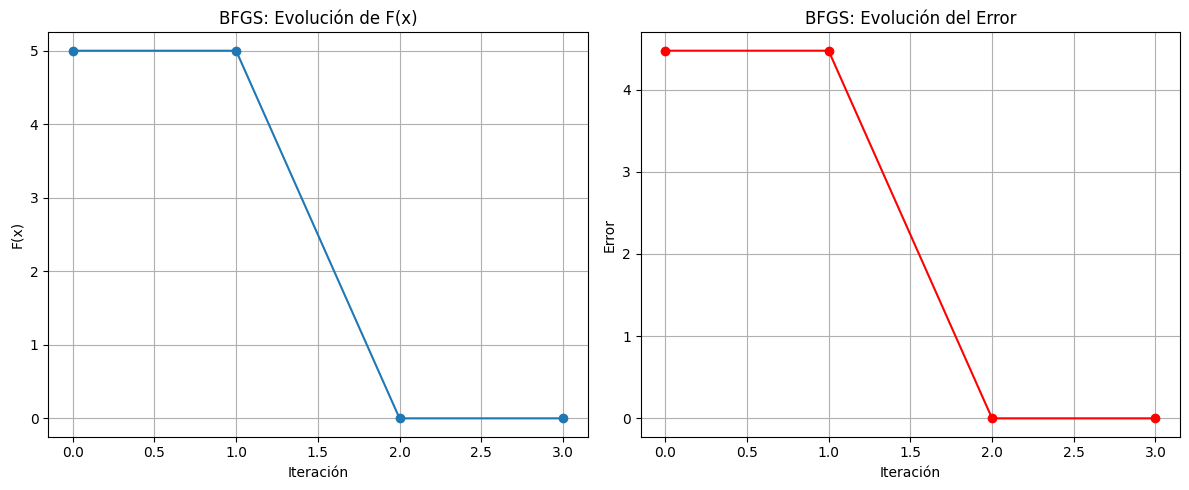

BFGS - Resultado: [1.000000, 2.000000]
Valor función: 0.00000000, Iteraciones: 3, Convergió: True


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Importar la clase (asumiendo que está en el mismo archivo o módulo)
# from descenso_gradiente import DescensoGradiente

class DescensoGradiente:
    def __init__(self, F, df):
        self.F = F     
        self.df = df   

    def plot_results(self, fk, errors, metodo):
        plt.figure(figsize=(12,5))
        
        plt.subplot(1,2,1)
        plt.plot(fk, marker='o')
        plt.title(f"{metodo}: Evolución de F(x)")
        plt.xlabel("Iteración")
        plt.ylabel("F(x)")
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(errors, marker='o', color='r')
        plt.title(f"{metodo}: Evolución del Error")
        plt.xlabel("Iteración")
        plt.ylabel("Error")
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    def conjugate_gradient_flerev(self, x0=np.zeros(2), alpha=0.01, maxIter=1000, tol=1e-10):
        xk = [np.array(x0, dtype=float)]
        fk = [self.F(x0)]
        errors = [np.linalg.norm(self.df(x0))]

        x = np.array(x0, dtype=float)
        grad = self.df(x)
        d = -grad

        for k in range(maxIter):
            grad_old = grad.copy()

            x_new = x + alpha * d
            grad = self.df(x_new)

            xk.append(x_new)
            fk.append(self.F(x_new))
            errors.append(np.linalg.norm(grad))

            if np.linalg.norm(grad) < tol:
                print(f"Gradiente Conjugado (Fletcher-Reeves): Convergió después de {k+1} iteraciones")
                self.plot_results(fk, errors, "Gradiente Conjugado (F-R)")
                return x_new, xk, fk, errors, k+1, True

            beta = np.dot(grad, grad) / np.dot(grad_old, grad_old)
            d = -grad + beta * d
            x = x_new

        print("Gradiente Conjugado (Fletcher-Reeves): No convergió")
        self.plot_results(fk, errors, "Gradiente Conjugado (F-R)")
        return x, xk, fk, errors, maxIter, False

    def bfgs_method(self, x0=np.zeros(2), tol=1e-6, maxIter=1000):
        x = np.array(x0, dtype=float)
        n = len(x)
        H = np.eye(n)
        xk = [x.copy()]
        fk = [self.F(x)]
        errors = [np.linalg.norm(self.df(x))]

        for k in range(maxIter):
            grad = self.df(x)
            d = - H.dot(grad)
            x_new = x + d
            grad_new = self.df(x_new)

            xk.append(x_new.copy())
            fk.append(self.F(x_new))
            errors.append(np.linalg.norm(grad_new))

            if np.linalg.norm(x_new - x) < tol:
                print(f"BFGS: Convergió (Δx < tol) después de {k+1} iteraciones")
                self.plot_results(fk, errors, "BFGS")
                return x_new, xk, fk, errors, k+1, True

            s = x_new - x
            y = grad_new - grad
            rho = 1.0 / np.dot(y, s)
            Hy = H.dot(y)
            H += np.outer(s, s) * rho - np.outer(Hy, Hy) / np.dot(y, Hy)

            x = x_new

        print("BFGS: No convergió")
        self.plot_results(fk, errors, "BFGS")
        return x, xk, fk, errors, maxIter, False

# ============================================================================
# EJEMPLO DE USO
# ============================================================================

def ejemplo_completo():
    print("="*60)
    print("EJEMPLO: Optimización de la función de Rosenbrock")
    print("="*60)
    
    # Definir la función de Rosenbrock: f(x,y) = (1-x)² + 100(y-x²)²
    # Mínimo global en (1,1) con valor f(1,1) = 0
    def rosenbrock(x):
        return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
    
    # Gradiente de la función de Rosenbrock
    def rosenbrock_grad(x):
        dfdx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
        dfdy = 200*(x[1] - x[0]**2)
        return np.array([dfdx, dfdy])
    
    # Crear instancia del optimizador
    optimizer = DescensoGradiente(rosenbrock, rosenbrock_grad)
    
    # Punto inicial
    x0 = np.array([2.0, 2.0])
    print(f"Punto inicial: {x0}")
    print(f"Valor inicial de la función: {rosenbrock(x0):.6f}")
    print(f"Norma del gradiente inicial: {np.linalg.norm(rosenbrock_grad(x0)):.6f}")
    print()
    
    # ========================================================================
    # MÉTODO 1: GRADIENTE CONJUGADO FLETCHER-REEVES
    # ========================================================================
    print("1. GRADIENTE CONJUGADO FLETCHER-REEVES")
    print("-" * 40)
    
    # Ejecutar el método
    x_opt_fr, xk_fr, fk_fr, errors_fr, iter_fr, converged_fr = optimizer.conjugate_gradient_flerev(
        x0=x0, 
        alpha=0.001,  # Tasa de aprendizaje pequeña para Rosenbrock
        maxIter=1000, 
        tol=1e-8
    )
    
    print(f"Punto óptimo encontrado: [{x_opt_fr[0]:.6f}, {x_opt_fr[1]:.6f}]")
    print(f"Valor de la función: {rosenbrock(x_opt_fr):.6f}")
    print(f"Iteraciones: {iter_fr}")
    print(f"¿Convergió?: {converged_fr}")
    print()
    
    # ========================================================================
    # MÉTODO 2: BFGS
    # ========================================================================
    print("2. MÉTODO BFGS")
    print("-" * 40)
    
    # Ejecutar el método BFGS
    x_opt_bfgs, xk_bfgs, fk_bfgs, errors_bfgs, iter_bfgs, converged_bfgs = optimizer.bfgs_method(
        x0=x0,
        tol=1e-8,
        maxIter=1000
    )
    
    print(f"Punto óptimo encontrado: [{x_opt_bfgs[0]:.6f}, {x_opt_bfgs[1]:.6f}]")
    print(f"Valor de la función: {rosenbrock(x_opt_bfgs):.6f}")
    print(f"Iteraciones: {iter_bfgs}")
    print(f"¿Convergió?: {converged_bfgs}")
    print()
    
    # ========================================================================
    # COMPARACIÓN DE RESULTADOS
    # ========================================================================
    print("3. COMPARACIÓN DE MÉTODOS")
    print("-" * 40)
    
    print(f"{'Método':<20} {'Punto Final':<20} {'F(x)':<12} {'Iteraciones':<12} {'Convergió':<10}")
    print("-" * 80)
    print(f"{'Fletcher-Reeves':<20} [{x_opt_fr[0]:.4f}, {x_opt_fr[1]:.4f}]     {rosenbrock(x_opt_fr):<12.6f} {iter_fr:<12} {converged_fr}")
    print(f"{'BFGS':<20} [{x_opt_bfgs[0]:.4f}, {x_opt_bfgs[1]:.4f}]     {rosenbrock(x_opt_bfgs):<12.6f} {iter_bfgs:<12} {converged_bfgs}")
    print(f"{'Óptimo teórico':<20} [1.0000, 1.0000]     {0.000000:<12.6f} {'-':<12} {'-'}")
    
    # ========================================================================
    # GRÁFICO COMPARATIVO
    # ========================================================================
    print("\n4. VISUALIZACIÓN COMPARATIVA")
    print("-" * 40)
    
    plt.figure(figsize=(15, 5))
    
    # Evolución de la función objetivo
    plt.subplot(1, 3, 1)
    plt.plot(fk_fr, 'b-', marker='o', label='Fletcher-Reeves', markersize=4)
    plt.plot(fk_bfgs, 'r-', marker='s', label='BFGS', markersize=4)
    plt.yscale('log')
    plt.title('Evolución de F(x)')
    plt.xlabel('Iteración')
    plt.ylabel('F(x) (escala log)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Evolución del error
    plt.subplot(1, 3, 2)
    plt.plot(errors_fr, 'b-', marker='o', label='Fletcher-Reeves', markersize=4)
    plt.plot(errors_bfgs, 'r-', marker='s', label='BFGS', markersize=4)
    plt.yscale('log')
    plt.title('Evolución del Error')
    plt.xlabel('Iteración')
    plt.ylabel('Error (escala log)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Trayectorias en el espacio 2D
    plt.subplot(1, 3, 3)
    xk_fr_array = np.array(xk_fr)
    xk_bfgs_array = np.array(xk_bfgs)
    
    plt.plot(xk_fr_array[:, 0], xk_fr_array[:, 1], 'b-', marker='o', 
             label='Fletcher-Reeves', markersize=4, alpha=0.7)
    plt.plot(xk_bfgs_array[:, 0], xk_bfgs_array[:, 1], 'r-', marker='s', 
             label='BFGS', markersize=4, alpha=0.7)
    plt.plot(1, 1, 'g*', markersize=15, label='Óptimo (1,1)')
    plt.plot(x0[0], x0[1], 'ko', markersize=8, label='Inicio')
    
    plt.title('Trayectorias de Convergencia')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def ejemplo_funcion_cuadratica():
    """Ejemplo adicional con una función cuadrática simple"""
    print("\n" + "="*60)
    print("EJEMPLO ADICIONAL: Función Cuadrática Simple")
    print("="*60)
    
    # Función cuadrática: f(x,y) = x² + y² - 2x - 4y + 5
    # Mínimo en (1, 2) con valor f(1,2) = 0
    def cuadratica(x):
        return x[0]**2 + x[1]**2 - 2*x[0] - 4*x[1] + 5
    
    def cuadratica_grad(x):
        return np.array([2*x[0] - 2, 2*x[1] - 4])
    
    optimizer = DescensoGradiente(cuadratica, cuadratica_grad)
    x0 = np.array([0.0, 0.0])
    
    print("Función: f(x,y) = x² + y² - 2x - 4y + 5")
    print("Mínimo teórico: (1, 2) con f(1,2) = 0")
    print(f"Punto inicial: {x0}")
    print()
    
    # Fletcher-Reeves
    x_opt_fr, _, _, _, iter_fr, conv_fr = optimizer.conjugate_gradient_flerev(
        x0=x0, alpha=0.1, tol=1e-10
    )
    
    print(f"Fletcher-Reeves - Resultado: [{x_opt_fr[0]:.6f}, {x_opt_fr[1]:.6f}]")
    print(f"Valor función: {cuadratica(x_opt_fr):.8f}, Iteraciones: {iter_fr}, Convergió: {conv_fr}")
    print()
    
    # BFGS
    x_opt_bfgs, _, _, _, iter_bfgs, conv_bfgs = optimizer.bfgs_method(
        x0=x0, tol=1e-10
    )
    
    print(f"BFGS - Resultado: [{x_opt_bfgs[0]:.6f}, {x_opt_bfgs[1]:.6f}]")
    print(f"Valor función: {cuadratica(x_opt_bfgs):.8f}, Iteraciones: {iter_bfgs}, Convergió: {conv_bfgs}")

# Ejecutar los ejemplos
if __name__ == "__main__":
    ejemplo_completo()
    ejemplo_funcion_cuadratica()